In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import lintest

In [2]:
# creating scaling and regression model variables
model = linear_model.LinearRegression()
train_split = 0.7
test_split = 0.3

In [3]:
# reading in dataset and dropping columns
df = pd.read_csv("trips_summary_sql.csv")

# filtering out the pandemic
df['pre_covid'] = (df.date < "12/1/2019").astype("int")
drop_cols = ['date', 'year', 'week_year', 'day_year', 'count', 'fare_tot', 'tip_tot', 'additional_tot',
             'trip_total_tot']
df.drop(drop_cols, axis=1, inplace=True)

# categorical / dummy variables
dummy_cols = ['month', 'week_day', 'hour', 'pickup_community_area']
df = pd.get_dummies(df, columns=dummy_cols, drop_first=True)

# splitting data
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=train_split, test_size=test_split, random_state=100)

y_train = pd.DataFrame(df_train["total_revenue"])
x_train = df_train.drop('total_revenue', axis=1)
y_test = pd.DataFrame(df_test["total_revenue"])
x_test = df_test.drop('total_revenue', axis=1)

# vif of trip_miles over 86
x_train = x_train.drop('trip_miles_tot', axis=1)
x_test = x_test.drop('trip_miles_tot', axis=1)

# vif of trip_seconds over 10
x_train = x_train.drop('trip_seconds_tot', axis=1)
x_test = x_test.drop('trip_seconds_tot', axis=1)

In [4]:
# # fit the model
reg = model.fit(x_train, y_train)
coefs = reg.coef_
print(coefs)
intercept = reg.intercept_
print(intercept)
score = reg.score(x_train, y_train)
print(score)
# prediction = reg.predict(x_test)

# fit model via sm
model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.params)
print(results.summary())

# LEFT TODO:
# plot error distribution


[[ 1.41346742e+01  2.23585411e+02 -1.51498626e+02 -4.95555999e+02
  -2.82133711e+02  5.72979675e+02  2.44253320e+02  2.72760438e+02
   2.87349477e+02  3.25831222e+02  1.64249841e+02  1.18696685e+02
  -5.25028352e+02 -4.49712006e+00 -3.65110140e+02 -2.76345203e+02
  -5.20298786e+02 -4.44387805e+02 -4.01510220e+02 -6.69319157e+02
  -8.52597243e+02 -7.65979324e+02 -5.45847502e+02 -1.96452545e+02
   2.88421797e+02  6.49426644e+02  4.80281915e+02  3.20111192e+02
   3.93141922e+02  4.82365647e+02  5.28326906e+02  5.87869958e+02
   7.92669942e+02  9.23724529e+02  1.21565551e+03  1.25381741e+03
   1.06986705e+03  8.29074167e+02  7.89950729e+02  6.92589181e+02
   3.81855766e+02 -4.65892357e+02  1.07960487e+03 -1.87703956e+02
   3.36082461e+01  6.44441749e+03  4.41977203e+03  1.78880260e+04
  -1.34433175e+03 -1.05224749e+03 -1.10822732e+03 -1.27562954e+03
  -1.17634241e+03 -6.63947535e+02 -6.40007923e+02 -2.48797662e+02
  -1.10134566e+03 -1.32933877e+03 -5.99865969e+02 -1.14643000e+03
  -2.13300

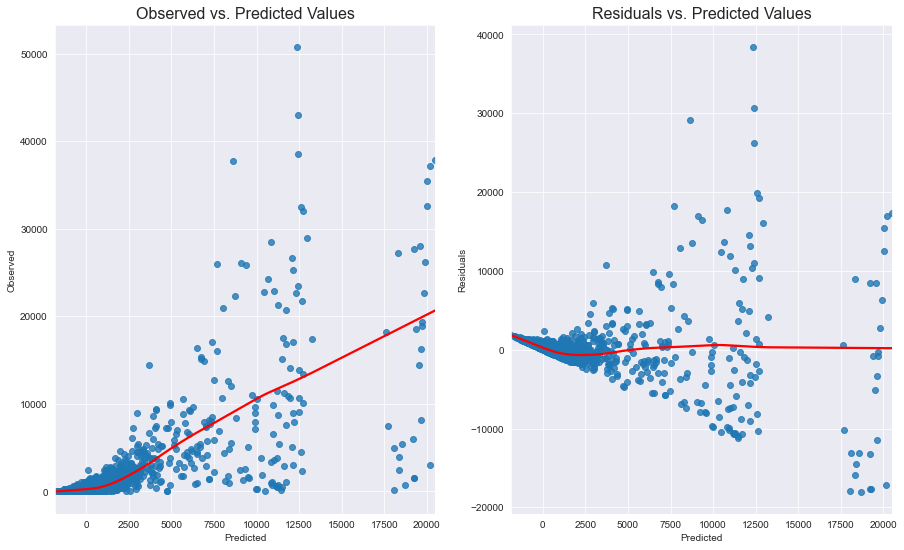

In [5]:
#Provide (Model, y_train, number of samples)
lintest.linearity_test(model, y_train, 2000)